In [1]:
G_path = '/Users/sepehrbe/My_Drive/DataSources/SkinCare'
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from CNN_NETs import CNN_Nets
from Net8 import Net8_a
pd.options.display.max_colwidth = 300

def plot_grid_results(model_):
    epochs_X = [i for i in range(1, len( list(model_['train_epoch_loss'])[0]) +1)]
    fig, axs = plt.subplots(1,2,figsize=(14,4))
    axs[0].plot(epochs_X , list(model_.train_epoch_loss)[0] , 'bo-', label='Train loss')
    axs[0].plot(epochs_X , list(model_.valid_epoch_loss)[0],'ro-', label='Validation loss')
    axs[0].plot(epochs_X , list(model_.test_epoch_loss)[0],'go-', label='Test loss')
    axs[0].set_xlabel("Epochs", fontsize = 12)
    axs[0].set_ylabel("Loss", fontsize = 12)
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title('Train and Validation loss by epochs', fontsize = 14)
    axs[1].plot(epochs_X , list(model_.train_epoch_acc)[0] , 'bo-', label='Train Accuracy')
    axs[1].plot(epochs_X , list(model_.valid_epoch_acc)[0] ,'ro-', label='Validation Accuracy')
    axs[1].plot(epochs_X , list(model_.test_epoch_acc)[0] ,'go-', label='Test Accuracy')
    axs[1].set_xlabel("Epochs", fontsize = 12)
    axs[1].set_ylabel("Accuracy", fontsize = 12)
    axs[1].grid()
    axs[1].legend()
    axs[1].set_title('Train and Validation Accuracy by epochs', fontsize = 14)
    plt.show()

In [2]:
# f = "CNN_280x210_Model7_21_Jun22_13-37"
# # f = '280x210_20_Jun_2022_21-50.csv'
# f = 'AtuoEncoder_20_Jun_2022_21-50.pkl'
# # f = 'CNN_280x210_Model3_21_Jun22_15-01'
# f = '280x210_21_Jun_2022_01-36.pkl'
# f = 'CNN_280x210_Model7_21_Jun22_13-37'
# GridSrach = pickle.load(open(G_path  + '/Saved/Models/Grid_Search_Models/' + f , 'rb'))
# GridSrach['test_metric'] = (GridSrach['test_accuracy'] + GridSrach['test_recall'] + GridSrach['blc_test_recall']) / 3
# GridSrach.sort_values('test_metric', ascending=False, inplace=True)

In [11]:
grid_label = ['CNN_280x210','22_Jun22','CNN_280x210_Model4_22_Jun22_00-14']
# grid_label = ['A_E_CNN','22_Jun22']

models_list = os.listdir(G_path  + '/Saved/Grid_Search_Results/')
models_list = [i for i in models_list if all(s in i for s in grid_label)]

In [12]:
len(models_list)

1

Mode:  CNN_280x210_Model4_22_Jun22_00-14
Hyper params:      {'Drop': 0.2, 'LR': 0.0011, 'Momentum': 0.77, 'Net': <class 'CNN_NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
Test overall Metric  0.6248711341803909
Test Accuracy  0.6560196560196561
Simple Avg. Test recall:  0.6185937465215166
Balanced test Recall :  0.6


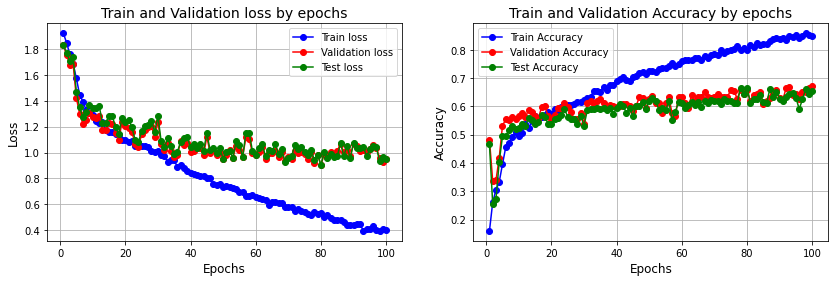

In [13]:
for m in models_list:
    # print('Mode: ', m)
    GridSrach = pickle.load(open(G_path  + '/Saved/Grid_Search_Results/' + m , 'rb'))
    details_ = GridSrach.iloc[[0]]
    if (details_.blc_test_recall[0] + details_.test_accuracy[0]) / 2 >= 0.61:
    # if m:   
        print('Mode: ', m)
        print('Hyper params: ', details_.hyper_param.iloc[[0]])
        print('Test overall Metric ', details_.test_overall_metric[0])
        print('Test Accuracy ', details_.test_accuracy[0])
        print('Simple Avg. Test recall: ', details_.test_recall[0])
        print('Balanced test Recall : ', details_.blc_test_recall[0])
        plot_grid_results(details_)

In [ ]:
path_ = G_Models + '/CNN_280x210/'
path_ = G_Models +  '/Grid_Search_Models/'
model_list = os.listdir(path_)
model_list = [i for i in model_list if 'Model' in i]
X = input_data[2]
Y = labels[2]
X_blc = Evaluation_set[0]
Y_blc = Evaluation_set[1]

for m in model_list:
    model_ = pickle.load(open(path_+ m , 'rb') )
    Y_pred = model_.forward_noDrop(X).argmax(dim=1)
    Y_pred_blc = model_.forward_noDrop(X_blc).argmax(dim=1)
    test_accuracy = sk.metrics.accuracy_score(Y, Y_pred )
    test_accurac_blc = sk.metrics.accuracy_score(Y_blc, Y_pred_blc )
    print('Model Name:\n' , m) 
    print('Test Accuracy:\n' , test_accuracy)
    print('Balanced Test Accuracy:\n' , test_accurac_blc)
    print('----------------------------------')